# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




Team 47:
    
David Alexis García Espinosa

Juan Jose Garcia Juarez

Kevin Alan García Macías

Andrea Carolina Garza Nacif

Juan Carlos Garza Sánchez

In [1]:
import numpy as np  # Se importa la biblioteca numpy, utilizada para operaciones con arreglos y matrices.

import torch  # Se importa el paquete PyTorch, usado para crear y entrenar redes neuronales.

import torch.nn as nn  # Se importa el submódulo torch.nn, que contiene clases y funciones para crear redes neuronales.
import torch.nn.functional as F  # Se importa torch.nn.functional como F, que contiene funciones para trabajar directamente con tensores, como activaciones.

from torch.utils.data import DataLoader  # Se importa DataLoader, que permite cargar datos en lotes para entrenar los modelos de manera eficiente.
from torch.utils.data import sampler  # Se importa sampler, que permite crear muestreadores personalizados para seleccionar datos durante el entrenamiento.

import torchvision.datasets as datasets  # Se importa el submódulo datasets de torchvision, que contiene conjuntos de datos populares para visión por computadora.
import torchvision.transforms as T  # Se importa el submódulo transforms como T, utilizado para aplicar transformaciones (recorte, redimensionado, etc.) a las imágenes.

from torchvision import models  # Se importan modelos preentrenados de torchvision, como ResNet, VGG, entre otros.


In [2]:
import matplotlib.pyplot as plt

### Descargar sets de datos

In [3]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/cifar-10/cifar-10-batches-py'
# DATA_PATH = '/Users/davidgarcia/Downloads/Advanced Machine Learning/Tarea 2/cifar-10-batches-py'

DATA_PATH = '/content/sample_data'  # Definición de la ruta donde se encuentran los datos a utilizar.
NUM_TRAIN = 45000  # Número de ejemplos de entrenamiento a utilizar.
MINIBATCH_SIZE = 64  # Tamaño de cada lote (batch) de datos durante el entrenamiento.

# Definición de las transformaciones para el conjunto de datos ImageNet
transform_imagenet = T.Compose([
    T.Resize(224),  # Redimensiona las imágenes al tamaño 224x224 píxeles.
    T.ToTensor(),  # Convierte las imágenes a tensores.
    T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Normaliza las imágenes con los valores medios y desviaciones estándar de ImageNet.
])

# Definición de las transformaciones para el conjunto de datos CIFAR-10
transform_cifar = T.Compose([
    T.ToTensor(),  # Convierte las imágenes a tensores.
    T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])  # Normaliza las imágenes con los valores medios y desviaciones estándar de CIFAR-10.
])

# Cargador del conjunto de entrenamiento
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                                 transform=transform_imagenet)  # Se carga el conjunto de datos CIFAR-10 para entrenamiento con las transformaciones de ImageNet.
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))  # Carga el conjunto de entrenamiento en lotes usando un muestreador que selecciona datos aleatoriamente.

# Cargador del conjunto de validación
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                               transform=transform_imagenet)  # Se carga el conjunto de validación con las mismas transformaciones de ImageNet.
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))  # Carga los datos de validación seleccionando ejemplos fuera del rango de entrenamiento.

# Cargador del conjunto de prueba
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                                transform=transform_imagenet)  # Se carga el conjunto de datos de prueba con las transformaciones de ImageNet.
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)  # Carga el conjunto de prueba en lotes, pero sin muestreador personalizado ya que se usan todos los datos.


100%|██████████| 170498071/170498071 [00:03<00:00, 48943347.22it/s]


Extracting /content/sample_data/cifar-10-python.tar.gz to /content/sample_data
Files already downloaded and verified
Files already downloaded and verified


In [4]:
for i, (x, y) in enumerate(val_loader):  # Itera sobre los lotes (batches) de datos en el val_loader (conjunto de validación).
    print(i, x.shape, y.shape)  # Imprime el índice del lote, la forma (dimensiones) del tensor de datos (x) y la forma de las etiquetas (y).


0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### Usar GPU

In [5]:
if torch.cuda.is_available():  # Verifica si hay una GPU disponible en el sistema.
    device = torch.device('cuda')  # Si está disponible, se asigna la GPU ('cuda') como el dispositivo para ejecutar los tensores y operaciones.
else:
    device = torch.device('cpu')  # Si no hay GPU, se usa la CPU como dispositivo para las operaciones.

print(device)  # Imprime el dispositivo que se va a utilizar (ya sea 'cuda' o 'cpu').


cuda


### Mostrar imágenes

La imagen muestreada representa un: Truck


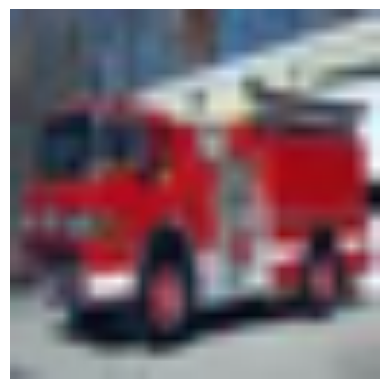

In [6]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# Lista que contiene los nombres de las clases correspondientes a las etiquetas del conjunto de datos CIFAR-10.

def plot_figure(image):
    # Definición de una función que recibe una imagen y la visualiza.
    plt.imshow(image.permute(1, 2, 0))
    # Se usa permute para cambiar el orden de los ejes del tensor para que sea compatible con el formato que espera imshow (altura, anchura, canales).
    plt.axis('off')  # Desactiva los ejes para que no se muestren en la imagen.
    plt.show()  # Muestra la imagen en pantalla.

rnd_sample_idx = np.random.randint(len(test_loader))
# Genera un índice aleatorio entre 0 y la longitud del conjunto de pruebas (test_loader).
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
# Imprime la clase de la imagen muestreada usando el índice aleatorio y el nombre de la clase correspondiente en la lista 'classes'.

image = test_loader.dataset[rnd_sample_idx][0]
# Recupera la imagen del conjunto de pruebas (test_loader) usando el índice aleatorio.

image = (image - image.min()) / (image.max() - image.min())
# Normaliza la imagen para que los valores estén entre 0 y 1, esto facilita la visualización.

plot_figure(image)
# Llama a la función plot_figure para visualizar la imagen normalizada.


### Calcular Accuracy

In [7]:
def accuracy(model, loader):
    # Definición de una función para calcular la precisión (accuracy) de un modelo en un conjunto de datos (loader).

    num_correct = 0  # Variable para contar el número de predicciones correctas.
    num_total = 0  # Variable para contar el número total de ejemplos evaluados.

    model.eval()  # Pone el modelo en modo de evaluación (desactiva dropout, batch normalization, etc.).
    model = model.to(device=device)  # Envía el modelo al dispositivo seleccionado (CPU o GPU).

    with torch.no_grad():  # Desactiva el cálculo de gradientes, ya que no es necesario para la evaluación.
        for (xi, yi) in loader:  # Itera sobre los lotes de datos (imágenes xi y etiquetas yi) en el cargador (loader).

            xi = xi.to(device=device, dtype=torch.float32)  # Envía los datos (imágenes) al dispositivo y los convierte a tipo float32.
            yi = yi.to(device=device, dtype=torch.long)  # Envía las etiquetas al dispositivo y las convierte a tipo long (entero).

            scores = model(xi)  # Realiza una predicción con el modelo para el lote de imágenes xi. 'scores' contiene las probabilidades para cada clase.

            _, pred = scores.max(dim=1)  # Encuentra la clase con la mayor puntuación (probabilidad máxima) para cada imagen. 'pred' contiene las predicciones.

            num_correct += (pred == yi).sum()  # Suma el número de predicciones correctas comparando 'pred' con las etiquetas verdaderas 'yi'.
            num_total += pred.size(0)  # Suma el número total de ejemplos procesados en este lote.

    return float(num_correct) / num_total  # Devuelve la precisión como el número de predicciones correctas dividido entre el total de ejemplos.



### Cargar modelo pre-cargado

In [8]:
model_resnet18 = models.resnet18(pretrained=True)
# Carga el modelo ResNet-18 preentrenado con los pesos entrenados en ImageNet.
# 'pretrained=True' indica que los pesos han sido previamente entrenados y no comenzará desde cero.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 101MB/s]


# Otros modelos pre entrenados

In [9]:
model_resnet50 = models.resnet50(pretrained=True)
# Carga el modelo ResNet-50 preentrenado con los pesos entrenados en ImageNet.
# ResNet-50 es una versión más profunda de ResNet-18, con 50 capas, lo que permite capturar más complejidad en las imágenes.
# 'pretrained=True' indica que los pesos han sido previamente entrenados en ImageNet.

model_densenet121 = models.densenet121(pretrained=True)
# Carga el modelo DenseNet-121 preentrenado con los pesos entrenados en ImageNet.
# DenseNet-121 es una arquitectura de red neuronal convolucional densa que conecta cada capa con todas las capas anteriores.
# 'pretrained=True' indica que los pesos han sido previamente entrenados en ImageNet.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 145MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Dow

#### Exploremos el modelo

In [10]:
for i, w in enumerate(model_resnet18.parameters()):
    # Itera sobre los parámetros del modelo ResNet-18. 'i' es el índice del parámetro y 'w' es el tensor del parámetro.

    print(i, w.shape, w.requires_grad)
    # Imprime el índice del parámetro, su forma (shape) y si el gradiente es necesario para ese parámetro (w.requires_grad).


0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

In [11]:
model_resnet18 # Ejemplo

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### Ajustar a nuestro modelo

In [12]:
model_aux = nn.Sequential(*list(model_resnet18.children()))
# Se crea un nuevo modelo secuencial `model_aux` a partir de las capas del modelo ResNet-18.
# 'model_resnet18.children()' devuelve una lista de todas las capas del modelo ResNet-18.
# El operador * se utiliza para desempaquetar la lista y pasarla como argumentos al contenedor `nn.Sequential`.

model_aux  # Muestra el contenido de `model_aux`, que será una secuencia de las capas del modelo ResNet-18.


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [13]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])
# Se crea un nuevo modelo secuencial `model_aux` tomando todas las capas del modelo ResNet-18 excepto la última capa.
# 'model_resnet18.children()' devuelve una lista de todas las capas del modelo, y '[:-1]' elimina la última capa (generalmente, la capa totalmente conectada para la clasificación en ResNet-18).
# El operador * desempaqueta la lista de capas para pasarlas al contenedor `nn.Sequential`.


In [14]:
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [15]:
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

In [16]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False


### Loop de entrenamiento

In [17]:
def train(model, optimiser, epochs=100):
    # Definición de una función para entrenar un modelo. Toma como parámetros el modelo, el optimizador y el número de épocas.
    # La función está diseñada para entrenar por defecto durante 100 épocas si no se especifica lo contrario.

#     def train(model, optimiser, scheduler = None, epochs=100):
    # (Código comentado opcional) Esta versión de la función permitiría incluir un scheduler (ajustador de la tasa de aprendizaje) opcional.

    model = model.to(device=device)
    # Envía el modelo al dispositivo seleccionado (CPU o GPU).

    for epoch in range(epochs):
        # Bucle principal que recorre las épocas de entrenamiento.

        for i, (xi, yi) in enumerate(train_loader):
            # Bucle interno que recorre los lotes (batches) de datos en el cargador de entrenamiento (train_loader).

            model.train()
            # Establece el modelo en modo de entrenamiento (esto es importante para activar capas como dropout o batch normalization).

            xi = xi.to(device=device, dtype=torch.float32)
            # Envía los datos de entrada (imágenes xi) al dispositivo (CPU o GPU) y los convierte a tipo float32.

            yi = yi.to(device=device, dtype=torch.long)
            # Envía las etiquetas (yi) al dispositivo y las convierte a tipo long (enteros), necesarios para la función de pérdida.

            scores = model(xi)
            # Realiza una predicción del modelo sobre el lote de datos xi. 'scores' contiene las puntuaciones (logits) para cada clase.

            cost = F.cross_entropy(input=scores, target=yi)
            # Calcula el costo (o pérdida) usando la función de entropía cruzada, que es adecuada para tareas de clasificación multi-clase.

            optimiser.zero_grad()
            # Reinicia los gradientes de los parámetros del modelo para el siguiente paso de optimización (evita la acumulación de gradientes).

            cost.backward()
            # Realiza la retropropagación calculando los gradientes del costo con respecto a los parámetros del modelo.

            optimiser.step()
            # Actualiza los parámetros del modelo usando el optimizador basado en los gradientes calculados.

        acc = accuracy(model, val_loader)
        # Calcula la precisión del modelo en el conjunto de validación tras cada época.

#         if epoch % 5 == 0:
        # (Código comentado opcional) Permitiría imprimir el costo y la precisión cada 5 épocas en lugar de cada época.

        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')
        # Imprime el número de época, el valor del costo (pérdida) y la precisión del modelo después de cada época.

#         scheduler.step()
        # (Código comentado opcional) Si se usa un scheduler de tasa de aprendizaje, se ajustaría la tasa de aprendizaje después de cada época.


In [18]:
hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 3
# Se definen los hiperparámetros del modelo:
# 'hidden1' y 'hidden' son el número de neuronas en las capas ocultas.
# 'lr' es la tasa de aprendizaje (learning rate) para el optimizador.
# 'epochs' es el número de épocas para entrenar el modelo.

# model1 = nn.Sequential(nn.Flatten(),
#                        nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
#                        nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
#                        nn.Linear(in_features=hidden, out_features=10))
# (Código comentado) Esta es una posible definición del modelo completamente desde cero, utilizando capas lineales y funciones de activación ReLU.

model1 = nn.Sequential(model_aux,
                       # Se usa el modelo preentrenado `model_aux`, que contiene las capas de ResNet-18 sin la última capa.
                       nn.Flatten(),
                       # Aplana la salida de `model_aux` en un vector de una sola dimensión antes de pasarla a la capa lineal.
                       nn.Linear(in_features=512, out_features=10, bias=True))
                       # Añade una capa lineal que toma la salida de 512 características de `model_aux` y la transforma en 10 clases (CIFAR-10).
                       # 'bias=True' significa que se usa un término de sesgo en la capa lineal.

optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))
# Se define el optimizador Adam con los parámetros del modelo `model1`, una tasa de aprendizaje de 5e-4 y los betas predeterminados de Adam (0.9 y 0.999).

# train(model1, optimiser, epochs)
# (Código comentado) Entrenamiento del modelo `model1` con el optimizador definido y por el número de épocas especificado.


In [19]:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
train(model1, optimiser, epochs) # Entrenamiento

Epoch: 0, costo: 1.1637706756591797, accuracy: 0.7774,
Epoch: 1, costo: 0.9808531999588013, accuracy: 0.7932,
Epoch: 2, costo: 0.6300203204154968, accuracy: 0.7992,


In [21]:
accuracy(model1, test_loader) # Evaluación

0.7966

In [22]:
model_aux_resnet50 = nn.Sequential(*list(model_resnet50.children())[:-1]) # Repetimos el procedimiento para los otros modelos
model_aux_densenet121 = nn.Sequential(*list(model_densenet121.children())[:-1])

In [23]:
# Cargar el modelo DenseNet121 preentrenado, eliminando la capa final de clasificación
model_aux_densenet121 = models.densenet121(pretrained=True)
# Eliminar la última capa de clasificador de DenseNet121
model_aux_densenet121.classifier = nn.Identity()

# Definición del modelo
model3 = nn.Sequential(
    model_aux_densenet121,           # Extractor de características (DenseNet121)
    nn.Linear(in_features=1024, out_features=10)  # Se ajusta in_features a 1024
)

# Definir el optimizador
optimiser = torch.optim.Adam(model3.parameters(), lr=5e-4, betas=(0.9, 0.999))


train(model3, optimiser, epochs=3)  # Entrenar el modelo durante 3 épocas
accuracy(model3, test_loader)  # Calcular la precisión del modelo en el conjunto de prueba


Epoch: 0, costo: 1.7962533235549927, accuracy: 0.8834,
Epoch: 1, costo: 0.6223049163818359, accuracy: 0.925,
Epoch: 2, costo: 0.8673479557037354, accuracy: 0.9262,


0.9223

In [25]:
# Cargar el modelo ResNet50 preentrenado, eliminando la capa final de clasificación
model_aux_resnet50 = models.resnet50(pretrained=True)
# Eliminar la última capa de clasificador de ResNet50
model_aux_resnet50.fc = nn.Identity()

# Definición del modelo
model4 = nn.Sequential(
    model_aux_resnet50,           # Extractor de características (ResNet50)
    nn.Linear(in_features=2048, out_features=10)  # Se ajusta in_features a 2048 para ResNet50
)

# Definir el optimizador
optimiser = torch.optim.Adam(model4.parameters(), lr=5e-4, betas=(0.9, 0.999))

# Entrenar el modelo durante 3 épocas
train(model4, optimiser, epochs=3)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy(model4, test_loader)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 0, costo: 0.6139822602272034, accuracy: 0.835,
Epoch: 1, costo: 0.07843600958585739, accuracy: 0.857,
Epoch: 2, costo: 0.12759079039096832, accuracy: 0.8962,


0.8944